In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tslearn as ts
sns.set_theme(style="whitegrid", font_scale=1.5, palette='Dark2')


In [6]:
n = np.arange(4,21,1)
tx_rx_dl, tx_rx_ul = [], []

forward_delay, backward_delay  = [],[]
for nn in n:
    d = pd.read_csv('results/lena_{}nodes_60.0dist.txt'.format(nn))
    forward_delay.append(np.mean(d['Mean Delay ms'].values[4:4+nn]))
    backward_delay.append(np.mean(d['Mean Delay ms'].values[4+nn:]))

    tx_rx_ul.append(np.average(np.array(d['TX bitrate kbit/s'].values[4:])-np.array(d['RX bitrate kbit/s'].values[4:])))
    # tx_rx_dl.append(np.average(np.array(d['TX bitrate kbit/s'].values[4+nn:])-np.array(d['RX bitrate kbit/s'].values[4+nn:])))


Text(0, 0.5, 'mean delay time')

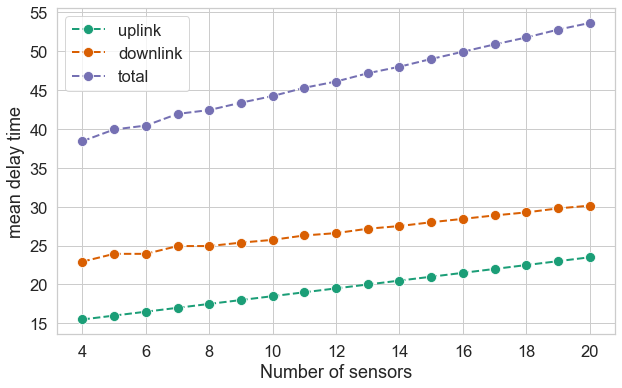

In [ ]:
fig, ax = plt.subplots( figsize=(10, 6))
total = np.array(backward_delay)+np.array(forward_delay)

sns.lineplot(x=n, y=forward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='uplink')
sns.lineplot(x=n, y=backward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='downlink')
sns.lineplot(x=n, y=total, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='total')

ax.set_xlabel('Number of sensors')
ax.set_ylabel('mean delay time')


Text(0, 0.5, 'mean delay time')

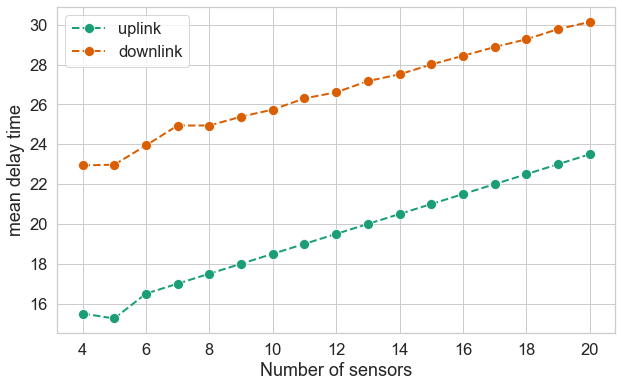

In [71]:
n = np.arange(4,21,1)
tx_rx_dl, tx_rx_ul = [], []

forward_delay, backward_delay  = [],[]
for nn in n:
    d = pd.read_csv('results/lena_{}nodes_0.500000dist.txt'.format(nn))
    forward_delay.append(np.mean(d['Mean Delay ms'].values[4:4+nn]))
    backward_delay.append(np.mean(d['Mean Delay ms'].values[4+nn:]))

    tx_rx_ul.append(np.average(np.array(d['TX bitrate kbit/s'].values[4:])-np.array(d['RX bitrate kbit/s'].values[4:])))
    # tx_rx_dl.append(np.average(np.array(d['TX bitrate kbit/s'].values[4+nn:])-np.array(d['RX bitrate kbit/s'].values[4+nn:])))

ig, ax = plt.subplots( figsize=(10, 6))
total = np.array(backward_delay)+np.array(forward_delay)

sns.lineplot(x=n, y=forward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='uplink')
sns.lineplot(x=n, y=backward_delay, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='downlink')
# sns.lineplot(x=n, y=total, lw=2, ax=ax, linestyle='--', markersize=10, marker='o', label ='total')

ax.set_xlabel('Number of sensors')
ax.set_ylabel('mean delay time')

In [51]:
# read data
data = pd.DataFrame()
for n in range(4,21):
    for dr in range(100, 501, 100):
        d = pd.read_csv("results/{}_nodes_{}_drate.txt".format(n,dr), sep='\t', header=None).T
        d.index = range(len(d))
        # data = data
        d.iloc[1,3] = d.iloc[1,3][1:-2]
        val = np.array(d.iloc[1,:].values, dtype=float)
        data = data.append({'numberOfNodes':int(val[0]), 'datarate':int(val[1]), 'avg_throughput':val[2], 'delay':val[3]}, ignore_index=True)

In [61]:
data_nodes = data.groupby('numberOfNodes').first()
data_nodes ['# nodes'] = data_nodes.index
data_nodes = data_nodes.drop(['datarate'], axis=1)
data_nodes.index = range(len(data_nodes))

Text(0, 0.5, 'delay [ns]')

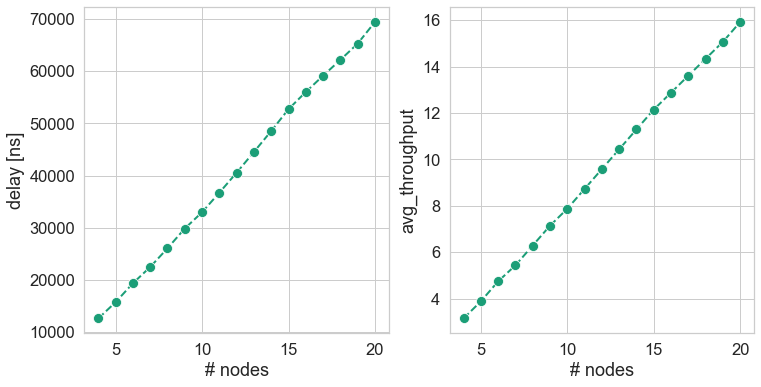

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.lineplot(data=data_nodes, x='# nodes',y='delay', lw=2, ax=ax[0], linestyle='--', markersize=10, marker='o')
sns.lineplot(data=data_nodes, x='# nodes',y='avg_throughput', lw=2, ax=ax[1], linestyle='--', markersize=10, marker='o')
ax[0].set_ylabel('delay [ns]')

(1000.0, 5000.0)

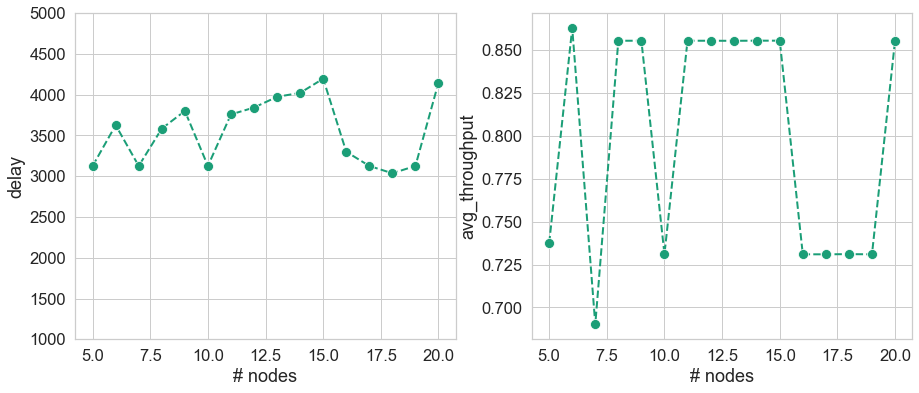

In [85]:
increments = data_nodes.diff().iloc[1:,:2]
increments['# nodes'] = data_nodes['# nodes']

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.lineplot(data=increments, x='# nodes',y='delay', lw=2, ax=ax[0], linestyle='--', markersize=10, marker='o')
sns.lineplot(data=increments, x='# nodes',y='avg_throughput', lw=2, ax=ax[1], linestyle='--', markersize=10, marker='o')
ax[0].set_ylim(1000,5000)

<AxesSubplot:>

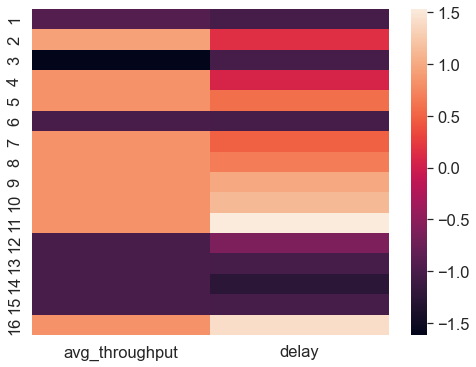

In [92]:
map = increments.iloc[:,:2]
normalized_map = (map-map.mean())/map.std()
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(normalized_map,ax=ax)